In [1]:
# imports
import market_status as ms
from IPython.display import display
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

## **World Markets**

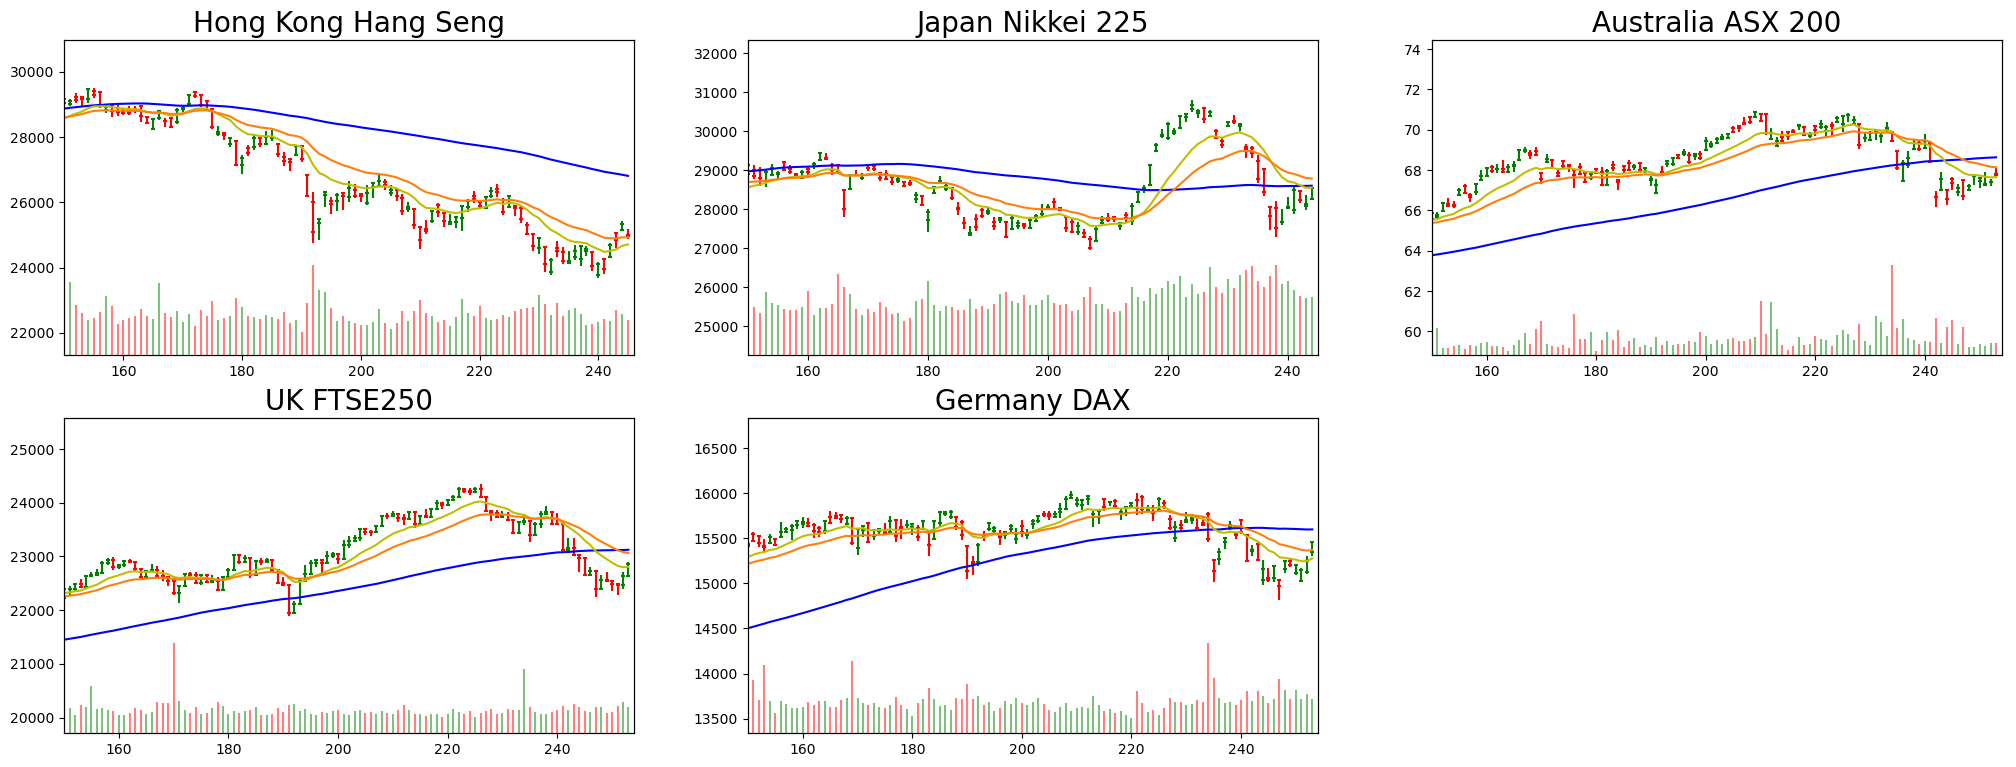

In [2]:
worldmarkets = ms.worldmarkets()
worldmarkets.show()

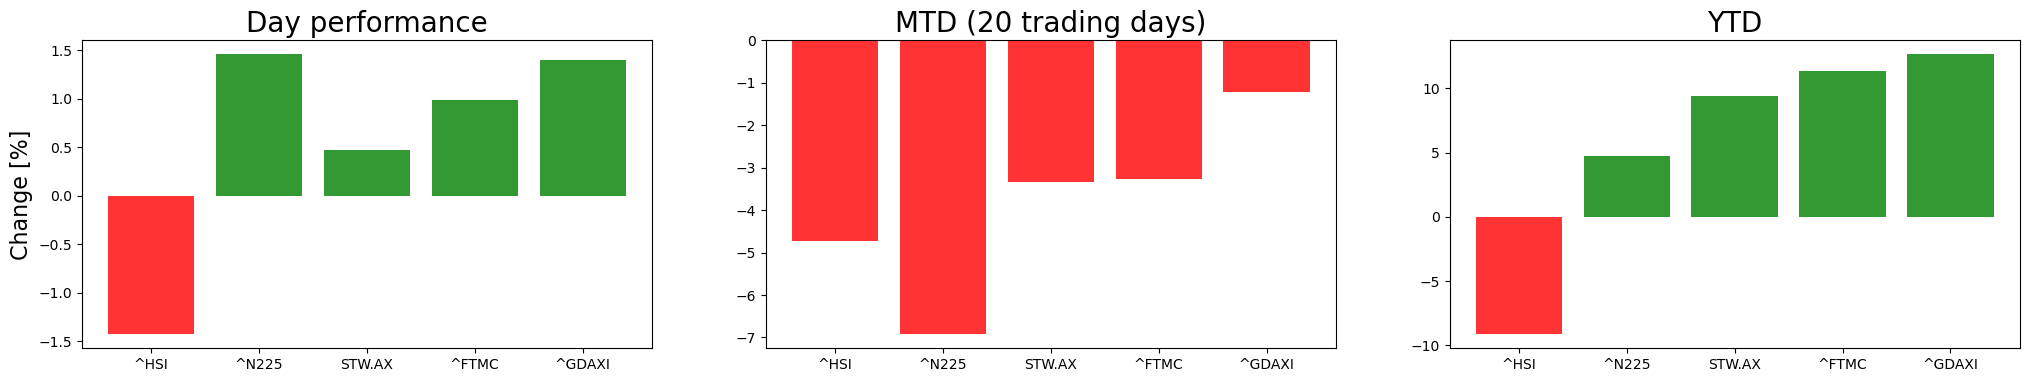

In [3]:
worldmarkets.performance()

***
## **American markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000 

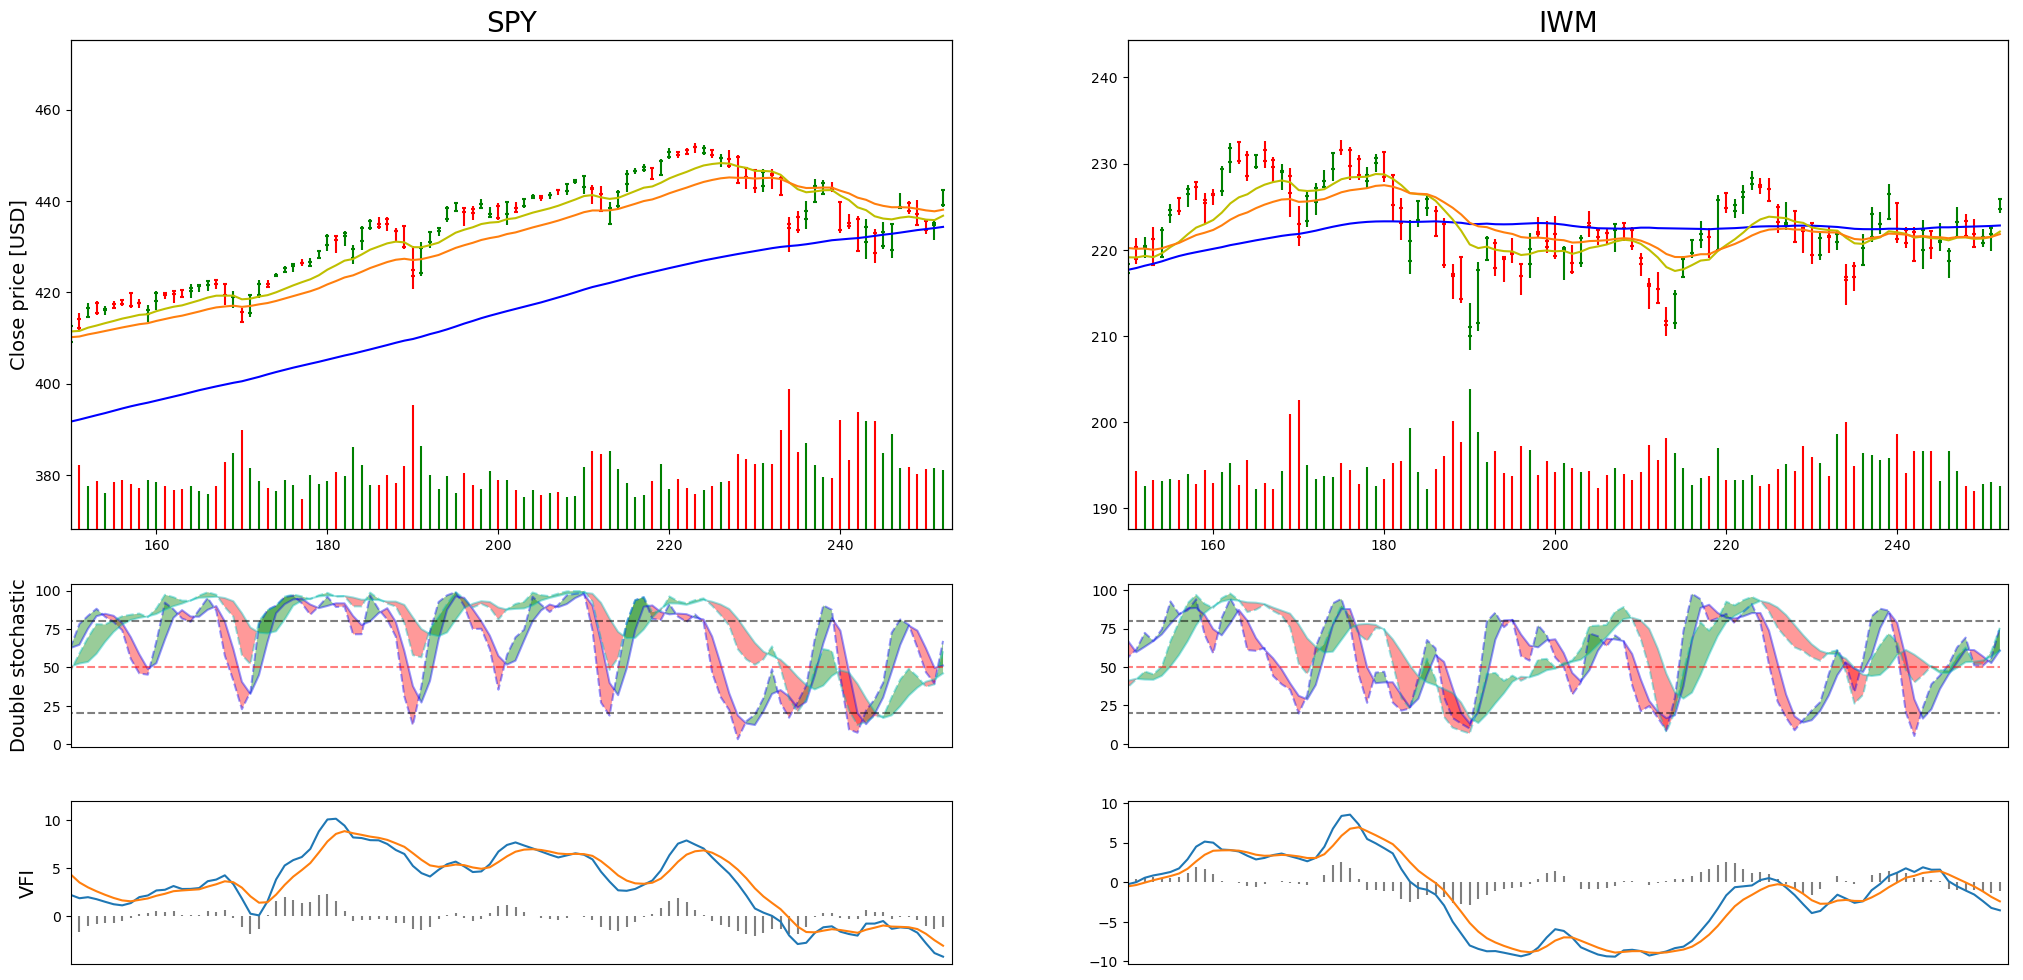

In [4]:
ms.show_usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

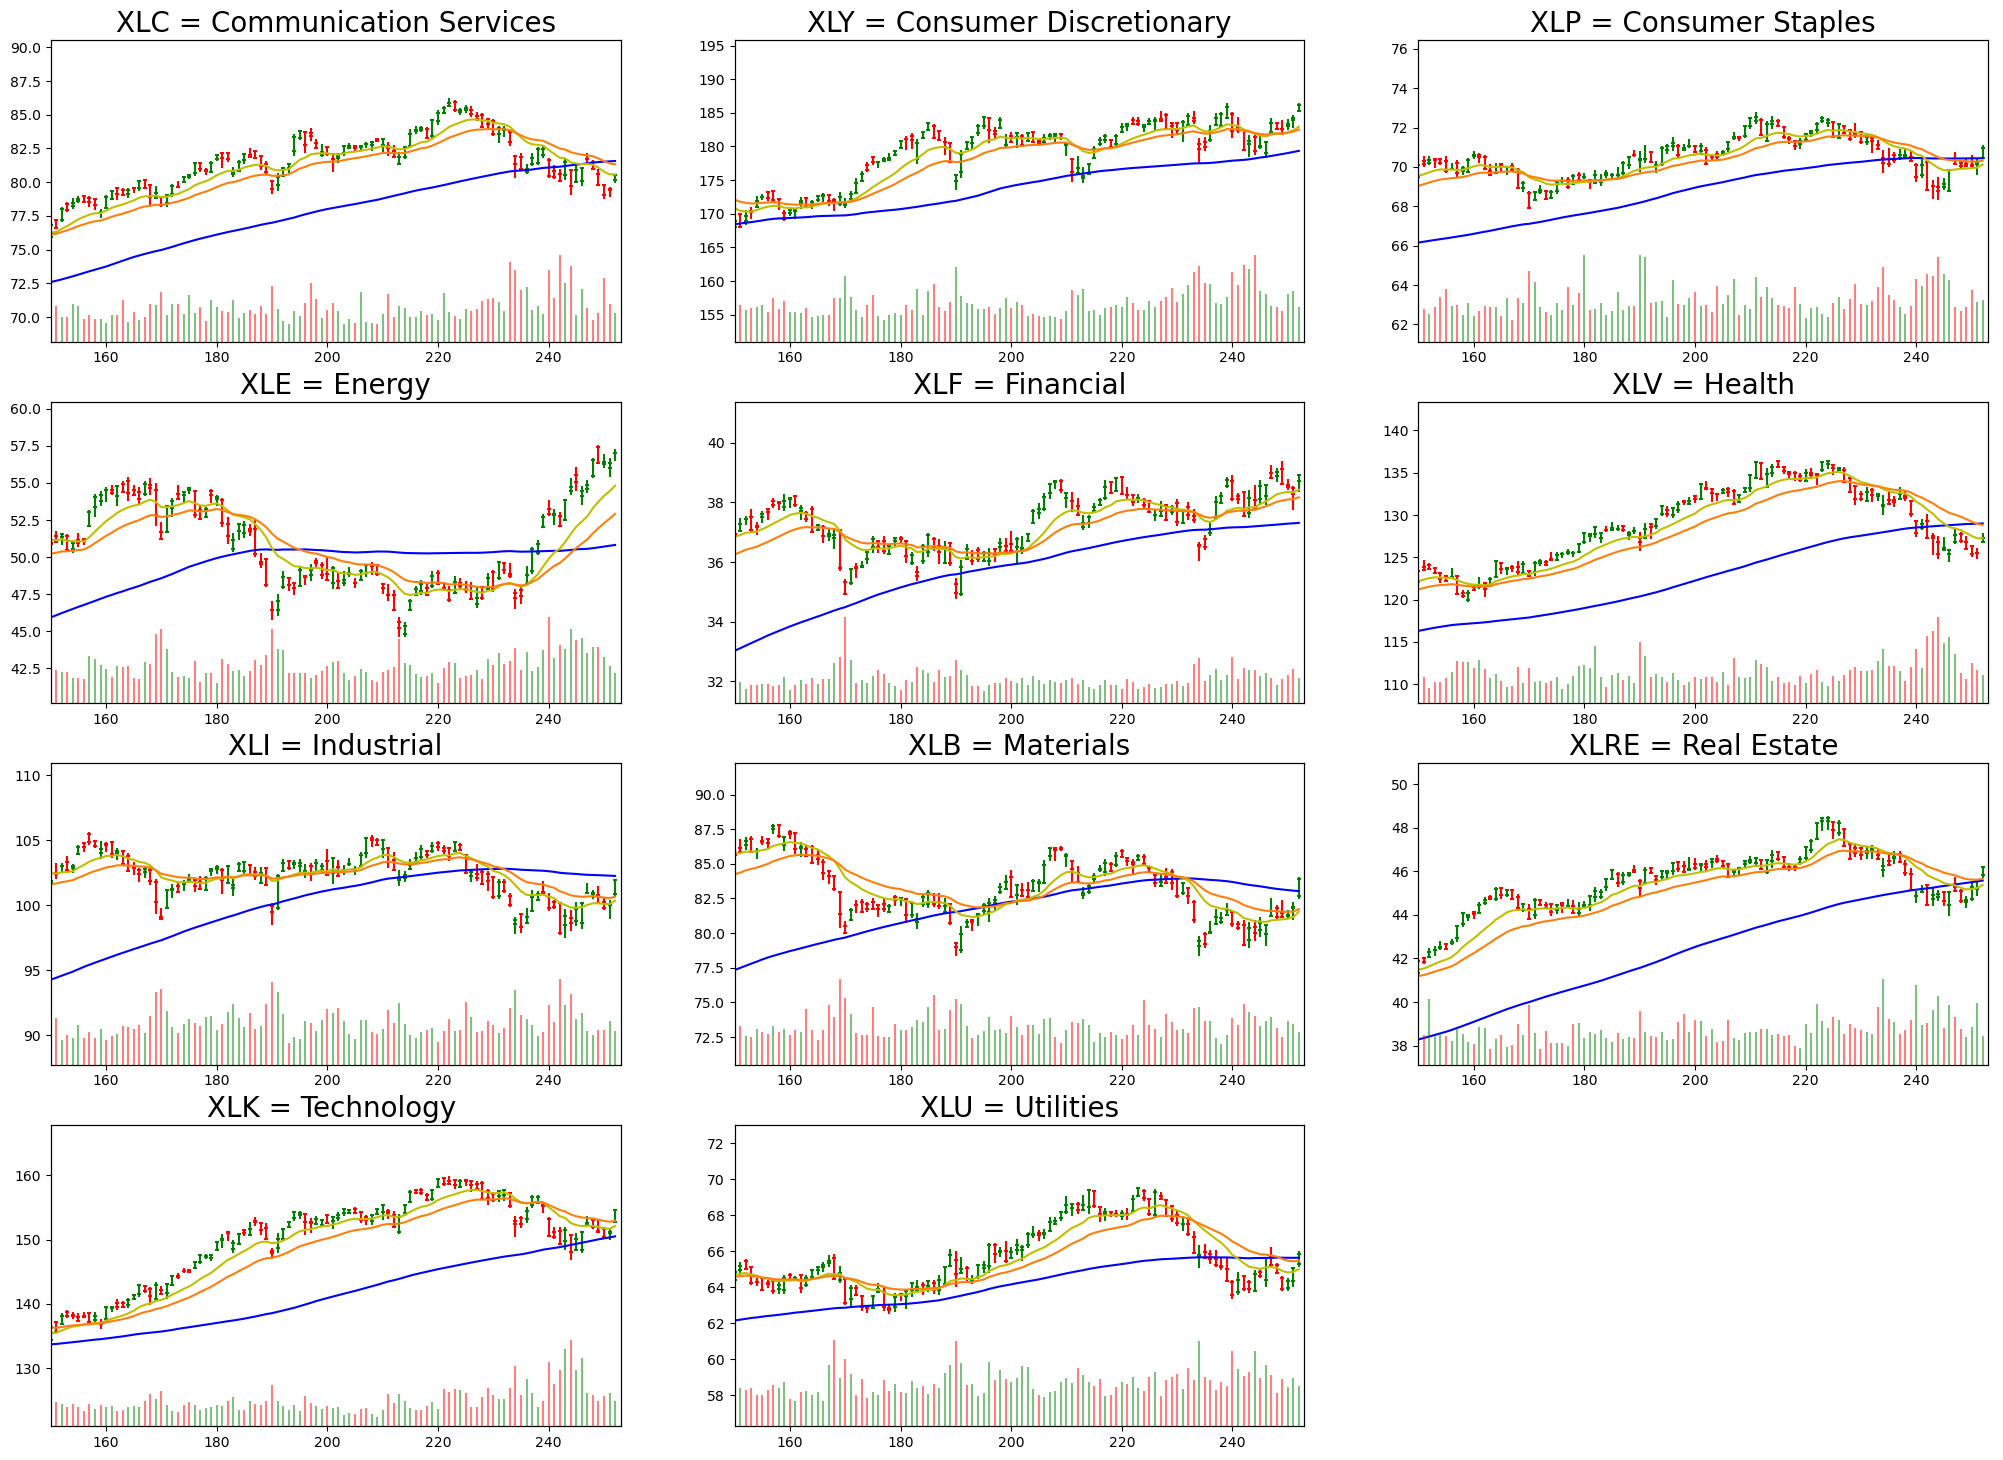

In [5]:
sectors = ms.sectors()
sectors.show()

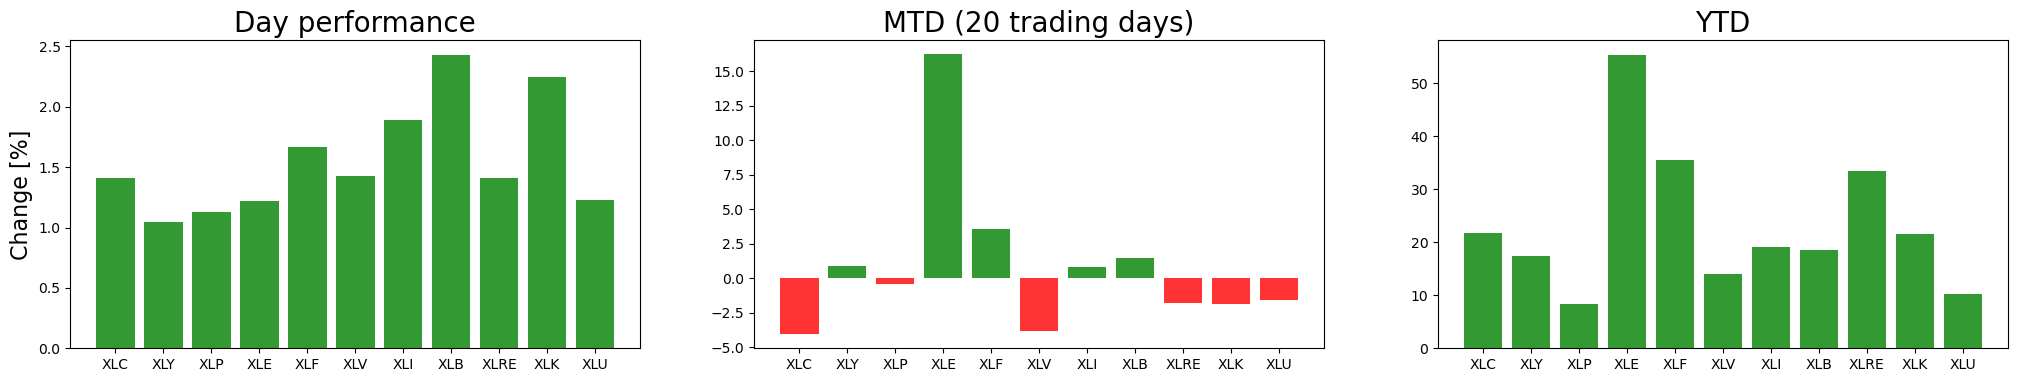

In [6]:
sectors.performance()

---
## **Other resources**

List of other good resources to check (these will be hopefully implemented into this notebook later)

1. [Market momentum](https://www.barchart.com/stocks/momentum) - Watch for the number of stocks which are declining and advancing and overall number of new highs/new lows
2. [SPY p/c ratio](https://www.barchart.com/etfs-funds/quotes/SPY/put-call-ratios) - P/C ratio >1 = bearish


In [7]:
# to be implemented

In [10]:
os.system('jupyter nbconvert --to html market_status.ipynb')


0

In [ ]:
# output information about SPY and IWM options 
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np

ticker = ["SPY", "IWM"]

# load ticker info
st = yf.Ticker(ticker[0])
# load options dates and calculate DTE (days to expiry)
today = dt.date.today()
dates = pd.DataFrame(data={"expiration":st.options})
dates["dte"] = [(today-dt.datetime.strptime(date,"%Y-%m-%d").date()) for date in dates["expiration"]]
dates["dte"] = np.abs(dates["dte"].dt.days)
# calculate options value for DTE <=10 and end of the next two months


c = st.option_chain(dates.loc[0, "expiration"]).calls["openInterest"].sum()
p = st.option_chain(dates.loc[0, "expiration"]).puts["openInterest"].sum()
cv = st.option_chain(dates.loc[0, "expiration"]).calls["volume"].sum()
pv = st.option_chain(dates.loc[0, "expiration"]).calls["volume"].sum()
print(ticker[0] + ": expiration " + dates.loc[0, "expiration"] + ", OI P/C ratio: " + str(np.round(p/c, 2)) + ", Volume P/C ratio: " + str(np.round(pv/cv, 2)))


# Other market factors: Put/Calls, New high/New low, decliners/advancers, % of stocks above SMA50
import requests
from bs4 import BeautifulSoup

url = "https://finviz.com/"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")
print(page.text)